## Кластеризация текста на основе датасета с 250 фильмами

___

### 1. Подключение библиотек

In [1]:
import pandas as pd
import string
import re
import nltk
import pymorphy3

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ROG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ROG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df =pd.read_csv("IMDB_dataset.csv")

In [6]:
df.head()

,title,year,description,duration,genre,country
0,The Shawshank Redemption,1994,"Банкир, осужденный за уксорицид, образует друж...",2 hours 22 minutes,"Epic, Period Drama, Prison Drama, Drama",United States
1,The Godfather,1972,Старение патриарха организованной криминальной...,2 hours 55 minutes,"Epic, Gangster, Tragedy, Crime, Drama",United States
2,The Dark Knight,2008,"Когда угроза, известная как Джокер, наносит ущ...",2 hours 32 minutes,"Action Epic, Epic, Superhero, Tragedy, Action,...",United States
3,The Godfather Part II,1974,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,3 hours 22 minutes,"Epic, Gangster, Tragedy, Crime, Drama",United States
4,12 Angry Men,1957,Присяжные в суде по делу об убийстве в Нью -Йо...,1 hour 36 minutes,"Legal Drama, Psychological Drama, Crime, Drama",United States


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        250 non-null    object
 1   year         250 non-null    int64 
 2   description  250 non-null    object
 3   duration     250 non-null    object
 4   genre        250 non-null    object
 5   country      250 non-null    object
dtypes: int64(1), object(5)
memory usage: 11.8+ KB


___

### 2. Предварительная обработка данных

1. Перевод всех букв в тексте в нижний регистр
2. Удаление знаков препинания
3. Токенизация по словам
4. Удаление стоп слов
5. Стемминг (приведение слов к нормальной форме)
6. Лемматизация

In [16]:
def remove_punctuation(text): 
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text): 
    return ''.join([i if not i.isdigit() else ' ' for i in text])

def remove_multiple_spaces(text): 
    return re.sub(r'\s+', ' ', text, flags=re.I)

st = '❯\xa0—«»'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [17]:
df['text_new'] = [remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(text.lower())))) for text in df['description']]

In [18]:
df.head()

,title,year,description,duration,genre,country,text_new
0,The Shawshank Redemption,1994,"Банкир, осужденный за уксорицид, образует друж...",2 hours 22 minutes,"Epic, Period Drama, Prison Drama, Drama",United States,банкир осужденный за уксорицид образует дружбу...
1,The Godfather,1972,Старение патриарха организованной криминальной...,2 hours 55 minutes,"Epic, Gangster, Tragedy, Crime, Drama",United States,старение патриарха организованной криминальной...
2,The Dark Knight,2008,"Когда угроза, известная как Джокер, наносит ущ...",2 hours 32 minutes,"Action Epic, Epic, Superhero, Tragedy, Action,...",United States,когда угроза известная как джокер наносит ущер...
3,The Godfather Part II,1974,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,3 hours 22 minutes,"Epic, Gangster, Tragedy, Crime, Drama",United States,ранняя жизнь и карьера вито корлеоне в х годах...
4,12 Angry Men,1957,Присяжные в суде по делу об убийстве в Нью -Йо...,1 hour 36 minutes,"Legal Drama, Psychological Drama, Crime, Drama",United States,присяжные в суде по делу об убийстве в нью йор...


In [19]:
russian_stopwords = stopwords.words("russian") 
russian_stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [20]:
russian_stopwords.extend(['т.д.', 'т', 'д', 'это','который', 'которая', 'с','своём','всем','наш', 'свой', 'ещё', "еще", "также", "так же", "всякий"]) 

In [21]:
def tokenize_text(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords and not re.search(r'[a-zA-Z]', token)]
    text = " ".join(tokens)
    return text

In [22]:
df['tokenize_texts'] = [tokenize_text(text) for text in df['text_new']]

In [23]:
stemmer = SnowballStemmer("russian")

stem_list = []
for text in (df['tokenize_texts']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = stemmer.stem(word)
            res.append(p)
        text = " ".join(res)
        stem_list.append(text)
    except Exception as e:
        print(e)
        
df['text_stem'] = stem_list

In [24]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [25]:
%%time
lemm_texts_list = []
for text in (df['tokenize_texts']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['text_lemm'] = lemm_texts_list

CPU times: total: 312 ms
Wall time: 311 ms


In [26]:
df['text_lemm'] = [tokenize_text(text) for text in df['text_lemm']]

___

# Облако слов

In [27]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

<Axes: >

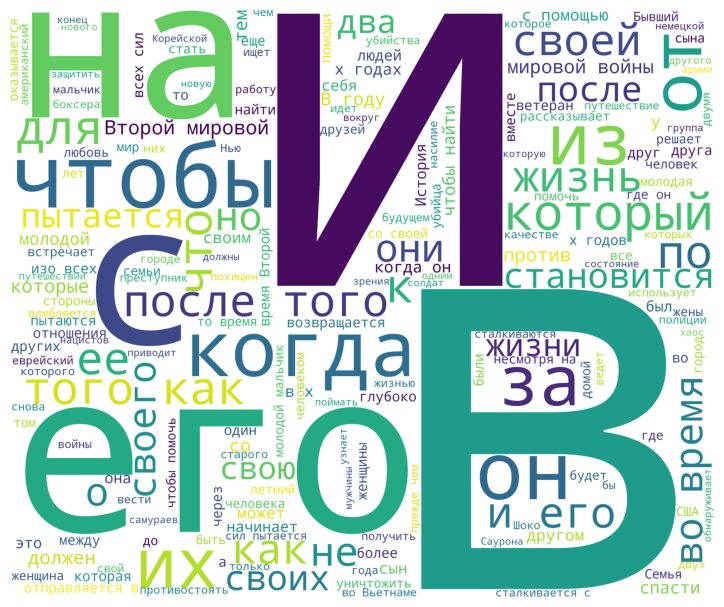

In [29]:
corpus = get_corpus(df['description'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

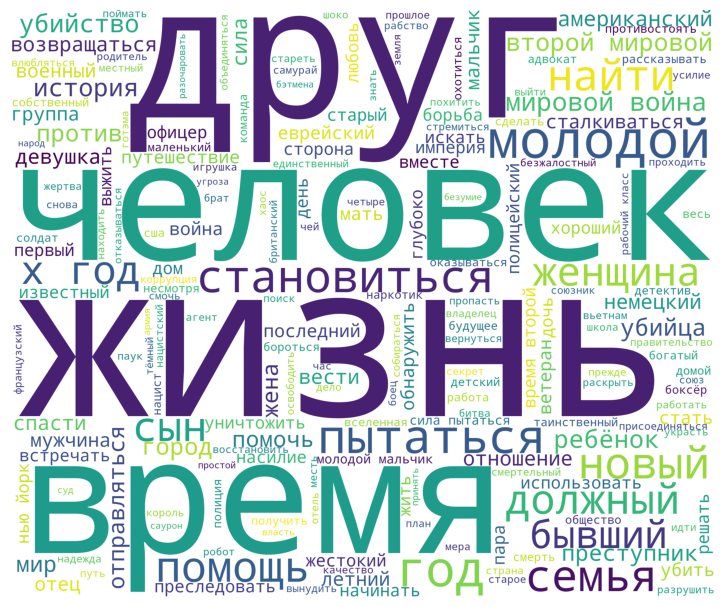

In [30]:
corpus = get_corpus(df['text_lemm'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [31]:
# Получение облака слов
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

<Axes: >

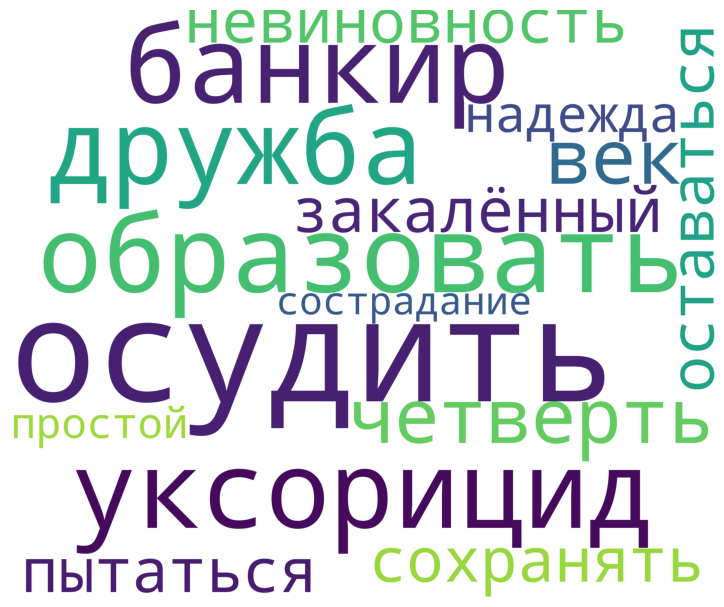

In [32]:
corpus = df['text_lemm'][0]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

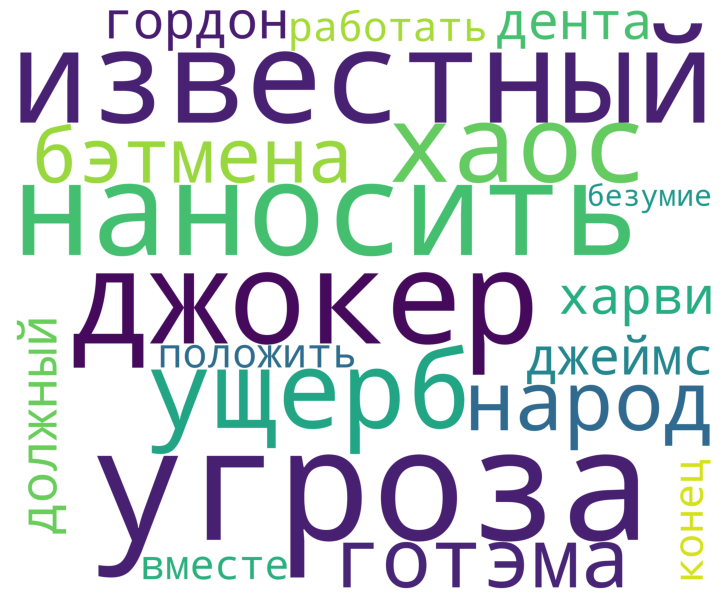

In [33]:
corpus = df['text_lemm'][2]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

___

## Векторизация текстовых данных

#### **Bag of words**

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
df['text_lemm'][0]

'банкир осудить уксорицид образовать дружба четверть век закалённый осудить сохранять невиновность пытаться оставаться надежда простой сострадание'

In [36]:
vectorizer = CountVectorizer()
vectorizer.fit(df['text_lemm'])

CountVectorizer()

In [37]:
print(vectorizer.vocabulary_)

{'банкир': 68, 'осудить': 1157, 'уксорицид': 1979, 'образовать': 1082, 'дружба': 467, 'четверть': 2095, 'век': 172, 'закалённый': 519, 'сохранять': 1774, 'невиновность': 1004, 'пытаться': 1515, 'оставаться': 1147, 'надежда': 944, 'простой': 1486, 'сострадание': 1771, 'старение': 1808, 'патриарх': 1218, 'организовать': 1133, 'криминальный': 759, 'династия': 430, 'передавать': 1228, 'контроль': 734, 'тайна': 1874, 'империя': 609, 'неохотный': 1032, 'сын': 1869, 'угроза': 1958, 'известный': 584, 'джокер': 421, 'наносить': 962, 'ущерб': 2009, 'хаос': 2046, 'народ': 971, 'готэма': 355, 'бэтмена': 156, 'джеймс': 412, 'гордон': 348, 'харви': 2048, 'дента': 391, 'должный': 448, 'работать': 1521, 'вместе': 208, 'положить': 1322, 'конец': 725, 'безумие': 83, 'ранний': 1549, 'жизнь': 498, 'карьера': 674, 'вить': 198, 'корлеон': 742, 'год': 340, 'изображаться': 596, 'время': 263, 'майкл': 837, 'расширять': 1564, 'подтягивать': 1299, 'власть': 203, 'отношение': 1175, 'синдикат': 1690, 'семейный': 1

In [38]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['text_lemm'])

In [39]:
count_matrix.shape

(250, 741)

In [40]:
vectorizer.get_feature_names_out()[45000:46000]

array([], dtype=object)

In [41]:
print(count_matrix)

  (0, 372)	1
  (0, 53)	1
  (0, 531)	1
  (0, 327)	1
  (0, 513)	1
  (0, 619)	1
  (1, 421)	1
  (1, 221)	1
  (1, 659)	1
  (2, 684)	1
  (2, 215)	1
  (2, 711)	1
  (2, 336)	1
  (2, 131)	1
  (2, 49)	1
  (2, 154)	1
  (2, 160)	1
  (2, 536)	1
  (2, 73)	1
  (2, 447)	1
  (2, 257)	1
  (2, 22)	1
  (2, 448)	1
  (3, 659)	1
  (3, 179)	1
  :	:
  (247, 340)	1
  (247, 532)	1
  (247, 28)	1
  (247, 604)	1
  (248, 175)	2
  (248, 362)	1
  (248, 12)	1
  (248, 176)	1
  (248, 499)	1
  (248, 213)	1
  (248, 420)	1
  (248, 184)	1
  (248, 564)	1
  (249, 531)	1
  (249, 719)	1
  (249, 643)	1
  (249, 624)	1
  (249, 677)	1
  (249, 533)	1
  (249, 585)	1
  (249, 482)	1
  (249, 678)	1
  (249, 300)	1
  (249, 608)	1
  (249, 193)	1


### **TF-IDF**

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [44]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_lemm'])

CPU times: total: 15.6 ms
Wall time: 17.2 ms


In [45]:
tfidf_matrix.shape

(250, 328)

In [46]:
tfidf_vectorizer.get_feature_names_out()[:100]

array(['агент', 'адвокат', 'американский', 'англия', 'анджелес', 'армия',
       'банда', 'бандит', 'безжалостный', 'безумие', 'битва', 'близкий',
       'бог', 'богатый', 'боевой', 'боец', 'боксёр', 'бороться', 'борьба',
       'брат', 'британский', 'бродяга', 'будущее', 'бывший', 'бэтмена',
       'век', 'вернуться', 'вести', 'весь', 'ветеран', 'взять',
       'владелец', 'власть', 'влюбляться', 'вместе', 'военный',
       'возвращаться', 'воин', 'война', 'вокруг', 'волшебный',
       'восстановить', 'время', 'время второй', 'время второй мировой',
       'вселенная', 'вскоре', 'встречать', 'второй', 'второй мировой',
       'второй мировой война', 'выжить', 'выйти', 'вынудить', 'выполнить',
       'высокий', 'вьетнам', 'гангстер', 'глубоко', 'го', 'го век', 'год',
       'город', 'готэма', 'гражданский', 'группа', 'дарт', 'девочка',
       'девушка', 'действие', 'дело', 'день', 'депрессия', 'детектив',
       'детский', 'джон', 'должный', 'дом', 'домой', 'дочь', 'друг',
       'друг

In [47]:
print(tfidf_matrix)

  (0, 25)	0.5167360839695784
  (0, 234)	0.36095022211117994
  (0, 150)	0.5366385402397056
  (0, 227)	0.5609971780776377
  (1, 103)	0.7624497542326485
  (1, 297)	0.6470474266006888
  (2, 309)	0.2914903013286871
  (2, 101)	0.259749195819409
  (2, 316)	0.2788337195118841
  (2, 154)	0.2914903013286871
  (2, 63)	0.2788337195118841
  (2, 24)	0.2914903013286871
  (2, 76)	0.212860433244441
  (2, 238)	0.2788337195118841
  (2, 34)	0.26849253919571947
  (2, 204)	0.2914903013286871
  (2, 115)	0.26849253919571947
  (2, 9)	0.2914903013286871
  (2, 205)	0.2914903013286871
  (3, 297)	0.4159611673650153
  (3, 89)	0.3119428678272945
  (3, 61)	0.3209930504045297
  (3, 42)	0.33087977268802343
  (3, 32)	0.5500444669475355
  (3, 182)	0.4632505547264193
  :	:
  (246, 252)	0.3185188383504078
  (246, 64)	0.35744153846841736
  (247, 234)	0.24532434668923986
  (247, 89)	0.21623763080910577
  (247, 267)	0.27843565427552447
  (247, 151)	0.2739377414108153
  (247, 306)	0.31330655832578774
  (247, 268)	0.33976928536

___

## Кластеризация данных

### **K-means**

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

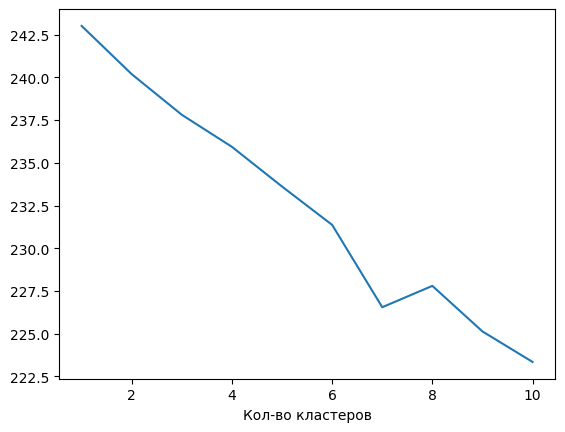

In [51]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Кол-во кластеров')
plt.show()

In [52]:
kmeans = KMeans(init='k-means++', n_clusters=7, n_init=10, random_state = 42)

In [53]:
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=7, n_init=10, random_state=42)

In [54]:
pred=kmeans.fit_predict(tfidf_matrix)

cluster
1    99
0    38
6    30
4    30
2    24
5    17
3    12
Name: count, dtype: int64


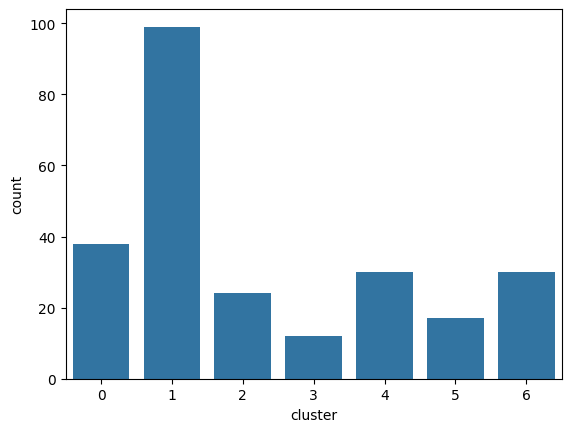

In [55]:
df['cluster'] = pred
print(df['cluster'].value_counts())
sns.countplot(x='cluster', data=df)
plt.show()

In [56]:
df.head()

,title,year,description,duration,genre,country,text_new,tokenize_texts,text_stem,text_lemm,cluster
0,The Shawshank Redemption,1994,"Банкир, осужденный за уксорицид, образует друж...",2 hours 22 minutes,"Epic, Period Drama, Prison Drama, Drama",United States,банкир осужденный за уксорицид образует дружбу...,банкир осужденный уксорицид образует дружбу че...,банкир осужден уксорицид образ дружб четверт в...,банкир осудить уксорицид образовать дружба чет...,1
1,The Godfather,1972,Старение патриарха организованной криминальной...,2 hours 55 minutes,"Epic, Gangster, Tragedy, Crime, Drama",United States,старение патриарха организованной криминальной...,старение патриарха организованной криминальной...,старен патриарх организова криминальн династ п...,старение патриарх организовать криминальный ди...,5
2,The Dark Knight,2008,"Когда угроза, известная как Джокер, наносит ущ...",2 hours 32 minutes,"Action Epic, Epic, Superhero, Tragedy, Action,...",United States,когда угроза известная как джокер наносит ущер...,угроза известная джокер наносит ущерб хаос нар...,угроз известн джокер нанос ущерб хаос народ го...,угроза известный джокер наносить ущерб хаос на...,1
3,The Godfather Part II,1974,Ранняя жизнь и карьера Вито Корлеоне в 1920 -х...,3 hours 22 minutes,"Epic, Gangster, Tragedy, Crime, Drama",United States,ранняя жизнь и карьера вито корлеоне в х годах...,ранняя жизнь карьера вито корлеоне х годах изо...,ран жизн карьер вит корлеон х год изобража вре...,ранний жизнь карьера вить корлеон х год изобра...,5
4,12 Angry Men,1957,Присяжные в суде по делу об убийстве в Нью -Йо...,1 hour 36 minutes,"Legal Drama, Psychological Drama, Crime, Drama",United States,присяжные в суде по делу об убийстве в нью йор...,присяжные суде делу убийстве нью йорке разочар...,присяжн суд дел убийств нью йорк разочарова од...,присяжный суд дело убийство нью йорк разочаров...,1


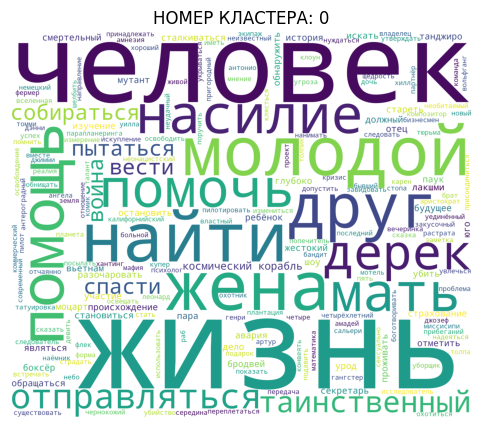

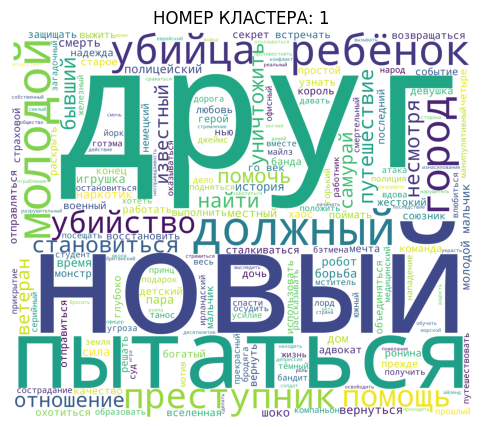

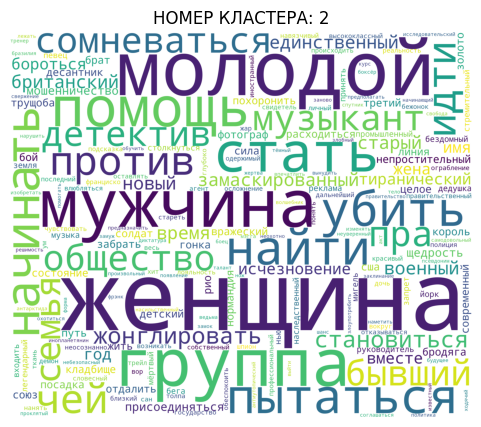

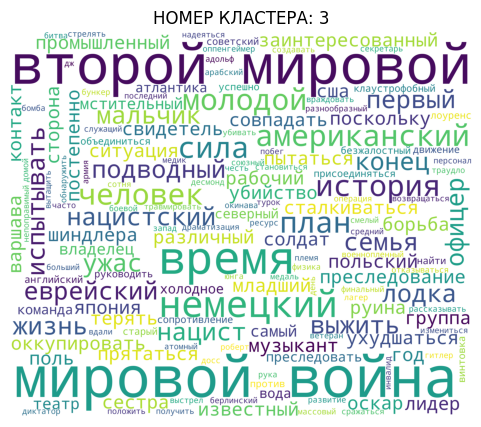

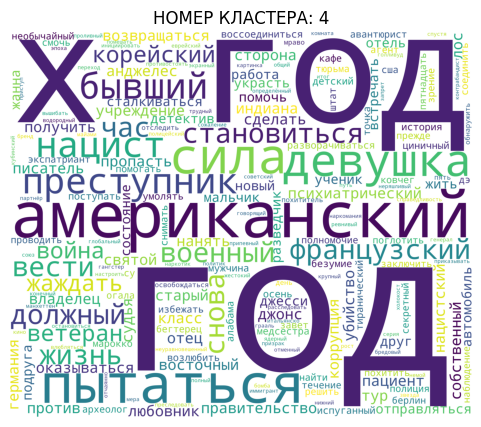

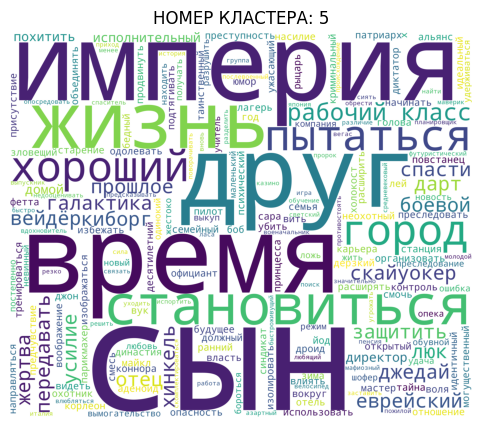

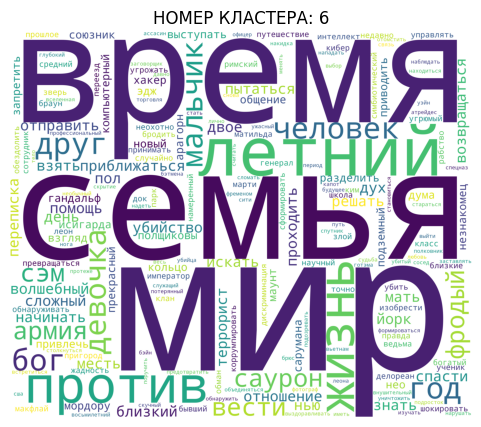

In [57]:
for i in sorted(df['cluster'].unique()):
    corpus = get_corpus(df[df['cluster'] == i].text_lemm.values)
    procWordCloud = get_wordCloud(corpus)
    
    fig = plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(procWordCloud)
    plt.axis('off')
    plt.title(f'НОМЕР КЛАСТЕРА: {i}')
    plt.subplot(1, 2, 1)